## GeelyAuto Case Study

### Importing and Understanding Data

In [43]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 

import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Importing CarPrice_Assignment.csv
cars = pd.read_csv('CarPrice_Assignment.csv')

In [45]:
# Looking at the first five rows
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [46]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### None of the columns have empty rows so there is no need for Data Cleaning. Next step would be Data Preparation

### Data Preparation

#### Extract company name from CarName column. Fix the spelling mistakes in company names.

In [47]:
cars['Company'] = cars['CarName'].apply(lambda x: x.split('-')[0].split(',')[0].split(' ')[0].lower())
cars['Company'] = cars['Company'].apply(lambda x: 'volkswagen' if (x == 'vw' or x == 'vokswagen') else x)
cars['Company'] = cars['Company'].apply(lambda x: 'toyota' if (x == 'toyouta') else x)
cars['Company'] = cars['Company'].apply(lambda x: 'subaru' if (x == 'saab') else x)
cars['Company'] = cars['Company'].apply(lambda x: 'mazda' if (x == 'maxda') else x)
cars['Company'] = cars['Company'].apply(lambda x: 'porsche' if (x == 'porcshce') else x)

In [48]:
cars['Company'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'subaru', 'toyota',
       'volkswagen', 'volvo'], dtype=object)

#### Created Company column from CarName column which can be used as categorical variable 

In [49]:
def assign_country(x):
    if (x == 'alfa'):
        return 'Italy'
    if (x == 'audi' or x == 'bmw' or x == 'porsche' or x == 'volkswagen'):
        return 'Germany'
    elif (x == 'chevrolet' or x == 'dodge' or x == 'buick' or x == 'mercury' or x == 'plymouth'):
        return 'USA'
    elif (x == 'honda' or x == 'isuzu' or x == 'mazda' or x == 'mitsubishi' or x == 'nissan' or x == 'toyota'):
        return 'Japan'
    elif (x == 'jaguar'):
        return 'UK'
    elif (x == 'peugeot' or x == 'renault'):
        return 'France'
    elif (x == 'subaru'):
        return 'Canada'
    elif (x == 'volvo'):
        return 'Sweden'

cars['manufacturing_country'] = cars['Company'].apply(lambda x: assign_country(x))

#### Created manufacturing_country column from Company column based on the headquarters of the company

In [50]:
cars_model1 = cars.drop(['car_ID','CarName', 'Company'],axis=1,inplace=False)

#### Create a dataframe by dropping 'car_ID',  'CarName' and 'Company' columns which cannot be used for modelling as we created a categorical variable out of it.

In [51]:
cars_model1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,manufacturing_country
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Italy
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Italy
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Italy
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Germany
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Germany


# Exploratory Data Analysis

### Univariate Analysis

C:\dev\products\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


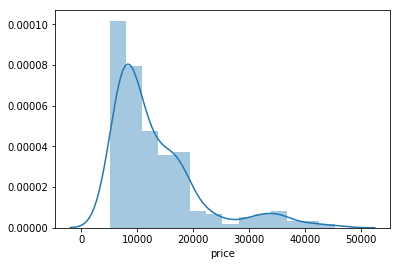

In [52]:
sns.distplot(cars['price'])
plt.show()

#### Most of the car prices lie in the range approximately 7000 USD to 16000 USD

### Bivariate Analysis
#### The objective here is to plot scatter garphs to understand how variables are correlated. Here price is correlated with other continuous variables 

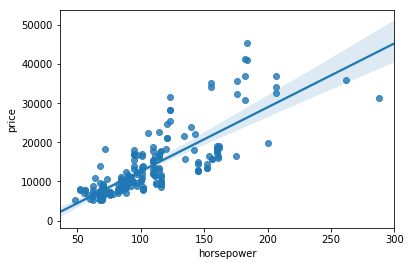

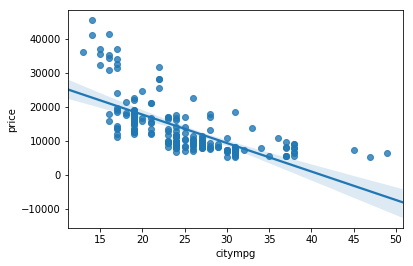

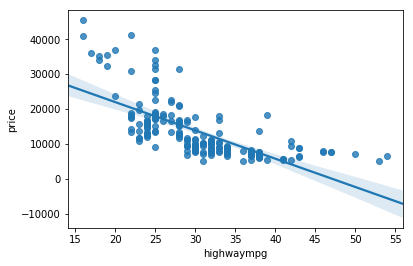

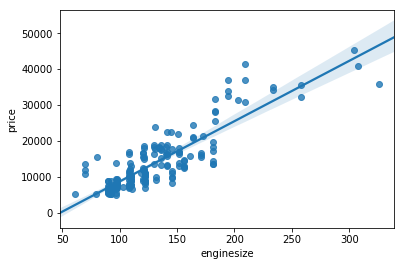

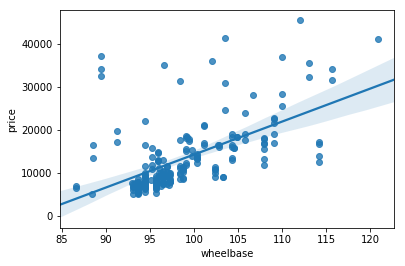

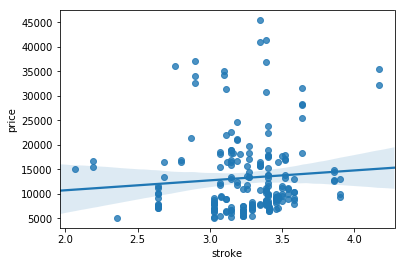

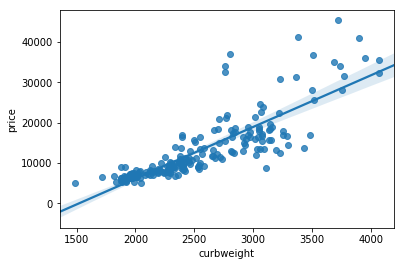

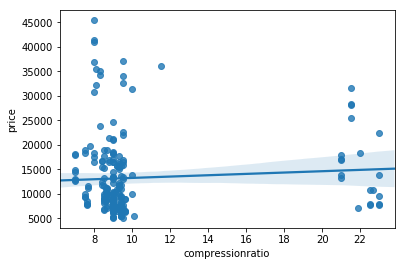

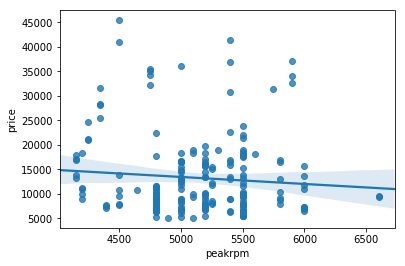

In [53]:
def display_bivariate_continuous_graph(x):
    sns.regplot(x=cars[x], y=cars['price'], fit_reg=True)
    plt.show()

display_bivariate_continuous_graph('horsepower')
display_bivariate_continuous_graph('citympg')
display_bivariate_continuous_graph('highwaympg')
display_bivariate_continuous_graph('enginesize')
display_bivariate_continuous_graph('wheelbase')
display_bivariate_continuous_graph('stroke')
display_bivariate_continuous_graph('curbweight')
display_bivariate_continuous_graph('compressionratio')
display_bivariate_continuous_graph('peakrpm')

#### As we can see from the above graphs that horsepower, enginesize and curbweight are closely correlated with price.

#### In the next plots, we will see how categorical variables are correlated with price.

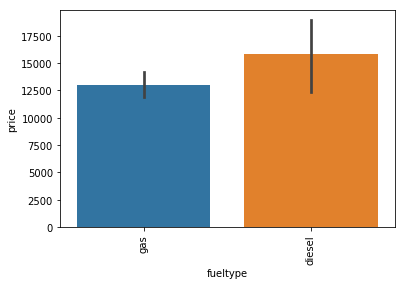

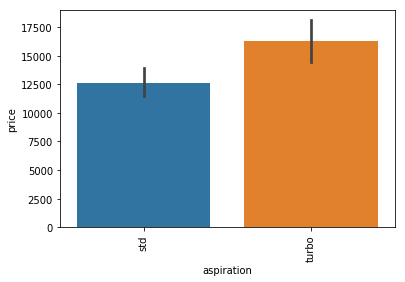

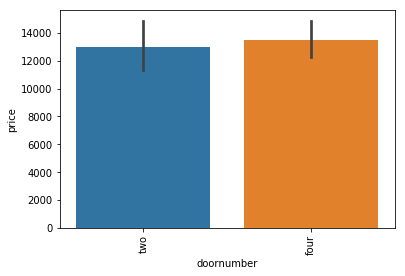

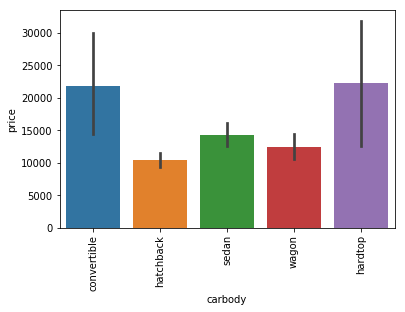

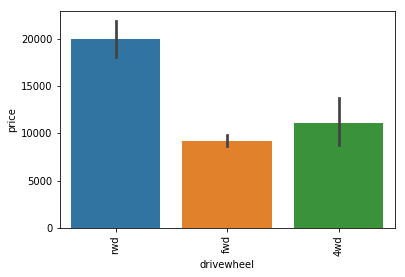

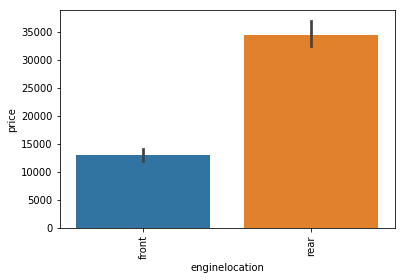

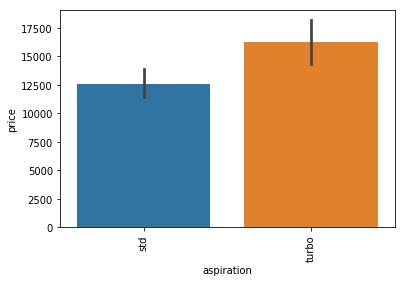

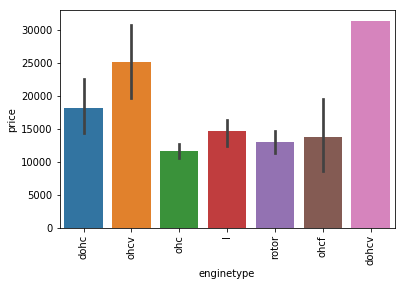

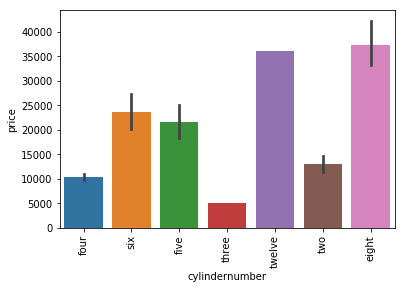

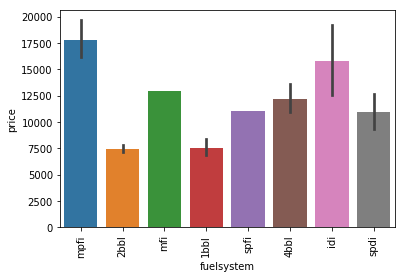

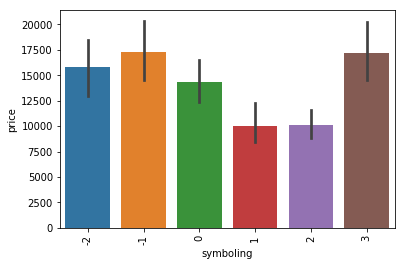

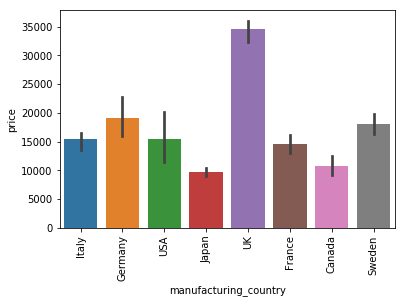

In [54]:
def display_bivariate_categorical_graph(x):
    sns.barplot(x=x, y='price', data=cars)
    plt.xticks(rotation=90)
    plt.show()

display_bivariate_categorical_graph('fueltype')
display_bivariate_categorical_graph('aspiration')
display_bivariate_categorical_graph('doornumber')
display_bivariate_categorical_graph('carbody')
display_bivariate_categorical_graph('drivewheel')
display_bivariate_categorical_graph('enginelocation')
display_bivariate_categorical_graph('aspiration')
display_bivariate_categorical_graph('enginetype')
display_bivariate_categorical_graph('cylindernumber')
display_bivariate_categorical_graph('fuelsystem')
display_bivariate_categorical_graph('symboling')
display_bivariate_categorical_graph('manufacturing_country')

### We get some insights on how categorical variables are distributed against car price
#### 1) Front engine cars cost less than rear engine cars
#### 2) Price distribution based on carbody type like sedan, hardtop etc.
#### 3) Price is equally distributed for 2 doors and 4 doors cars
#### 4) turbo engine cars are costlier than standard cars
#### 5) Diesel cars cost slightly more than cars use gas
#### 6) Cars manufactured in UK are costlier compared to Germany followed by Sweden etc. 

## Let's see the correlation matrix on continuous variables

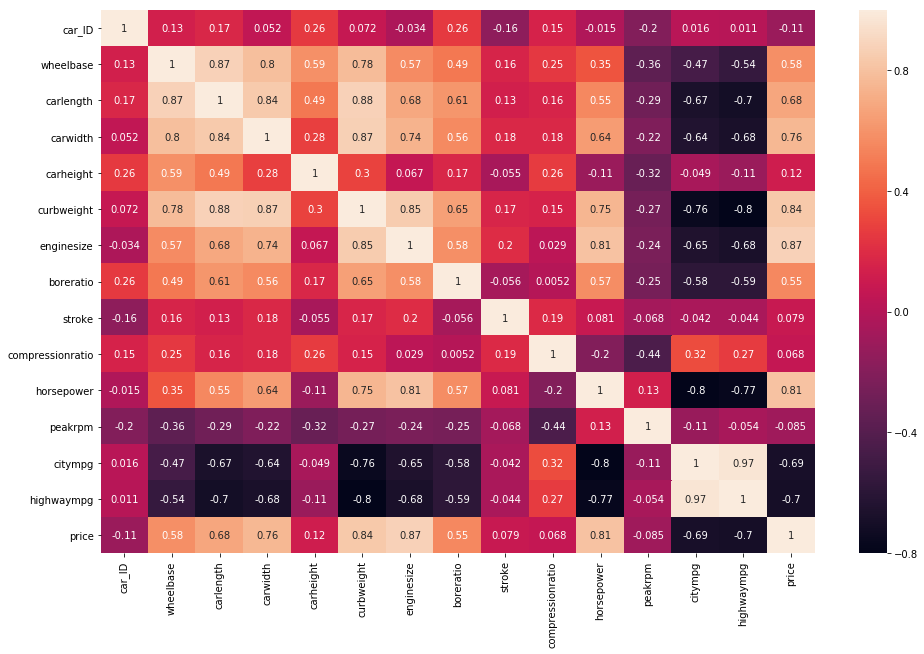

In [55]:
col = cars.columns
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(cars.drop(['symboling'], axis=1).corr(),annot = True)
plt.show()

### Converting Categorical variables to binary numeric values so that these variables can be used for analysis

In [56]:
def categorical_to_binary_columns(column_name, cars_temp):
    temp_column_name = pd.get_dummies(cars_temp[column_name],drop_first=True,prefix=[column_name])
    cars_temp = pd.concat([cars_temp,temp_column_name],axis=1)
    cars_temp.drop([column_name],axis=1,inplace=True)
    return cars_temp

    
cars_model1 = categorical_to_binary_columns('drivewheel', cars_model1)
cars_model1 = categorical_to_binary_columns('enginetype', cars_model1)
cars_model1 = categorical_to_binary_columns('cylindernumber', cars_model1)
cars_model1 = categorical_to_binary_columns('fuelsystem', cars_model1)
cars_model1 = categorical_to_binary_columns('carbody', cars_model1)
cars_model1 = categorical_to_binary_columns('symboling', cars_model1)
cars_model1 = categorical_to_binary_columns('enginelocation', cars_model1)
cars_model1 = categorical_to_binary_columns('fueltype', cars_model1)
cars_model1 = categorical_to_binary_columns('doornumber', cars_model1)
cars_model1 = categorical_to_binary_columns('aspiration', cars_model1)
cars_model1 = categorical_to_binary_columns('manufacturing_country', cars_model1)

In [57]:
cars_model1.columns = cars_model1.columns.str.replace("\'", "")
cars_model1.columns = cars_model1.columns.str.replace("[", "")
cars_model1.columns = cars_model1.columns.str.replace("]", "")

### Rescaling the Variables
#### As there are variables like peakrpm which is in thousands range and boreratio which is in range numeric 3. It is important to rescale the variables so that they can be compared. In this model, let's use Normalisation so that all variables are scaled in the range [0,1]

In [58]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
cars_model1 = cars_model1.apply(normalize)

In [59]:
cars_model1.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'enginelocation_rear',
       'fueltype_gas', 'doornumber_two', 'aspiration_turbo',
       'manufacturing_country_France', 'manufacturing_country_Germany',
       'man

#### UDF for calculating vif value

In [60]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [61]:
# test_model is used to perform analysis on the data model.
def test_model(X, y):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)
    X_train_rfe = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train_rfe).fit()
    print(lm.summary())

### Splitting data into training and testing sets

#### We will start building a model with 3 variables which are highly corrleted with price variable which we did from correlation graph and bivariate analisys.
#### 1) enginesize 2) horsepower 3) curbweight

In [62]:
X = cars_model1[['enginesize','horsepower','curbweight']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.16e-51
Time:                        23:31:35   Log-Likelihood:                 154.47
No. Observations:                 143   AIC:                            -300.9
Df Residuals:                     139   BIC:                            -289.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1141      0.015     -7.469      0.0

,Var,Vif
0,enginesize,16.60
2,curbweight,13.22
1,horsepower,9.15


#### As the p values are low, we will keep these variables for time being and start adding more variables which are  correlated - carwidth is the next variable

In [63]:
X = cars_model1[['enginesize','horsepower','curbweight','carwidth']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.91e-51
Time:                        23:31:35   Log-Likelihood:                 157.46
No. Observations:                 143   AIC:                            -304.9
Df Residuals:                     138   BIC:                            -290.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1422      0.019     -7.502      0.0

,Var,Vif
2,curbweight,35.88
3,carwidth,20.73
0,enginesize,16.66
1,horsepower,9.16


#### Upon adding car width, VIF of curbweight has increased a lot so lets remove curbweight which has very high VIF value and continue with analysis

In [64]:
X = cars_model1[['enginesize','horsepower','carwidth']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.63e-51
Time:                        23:31:35   Log-Likelihood:                 154.27
No. Observations:                 143   AIC:                            -300.5
Df Residuals:                     139   BIC:                            -288.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1465      0.019     -7.619      0.0

,Var,Vif
0,enginesize,13.06
1,horsepower,8.90
2,carwidth,7.64


#### Data model fairly looks fine. The next highly correlated variable is carheight. As it is highly correlated with carwidth and less correlated to price. We will skip this variable and look at highly negatively correlated variable highwaympg

In [65]:
X = cars_model1[['enginesize','horsepower','carwidth','highwaympg']]
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.91e-50
Time:                        23:31:35   Log-Likelihood:                 154.63
No. Observations:                 143   AIC:                            -299.3
Df Residuals:                     138   BIC:                            -284.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1115      0.046     -2.431      0.0

,Var,Vif
0,enginesize,13.19
2,carwidth,12.53
1,horsepower,9.43
3,highwaympg,2.65


#### No use of adding this variable, p value of highwaympg is 0.402 which is not significant. We will skip citympg as well, both highwaympg and citympg  Let's add wheelbase which is next highly correlated

In [66]:
X = cars_model1[['enginesize','horsepower','carwidth','wheelbase']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.37e-50
Time:                        23:31:35   Log-Likelihood:                 155.41
No. Observations:                 143   AIC:                            -300.8
Df Residuals:                     138   BIC:                            -286.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1454      0.019     -7.589      0.0

,Var,Vif
2,carwidth,25.47
3,wheelbase,16.64
0,enginesize,14.00
1,horsepower,10.69


#### No use of adding this variable, p value is 0.137 which is not significant. Let's add boreratio which is next highly correlated

In [67]:
X = cars_model1[['enginesize','horsepower','carwidth','boreratio']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     155.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.02e-50
Time:                        23:31:35   Log-Likelihood:                 154.30
No. Observations:                 143   AIC:                            -298.6
Df Residuals:                     138   BIC:                            -283.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1432      0.024     -6.001      0.0

,Var,Vif
2,carwidth,14.28
0,enginesize,13.06
3,boreratio,10.49
1,horsepower,9.12


#### No use of adding this variable, p value is 0.81

In [68]:
X = cars_model1[['enginesize','horsepower','carwidth']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.63e-51
Time:                        23:31:35   Log-Likelihood:                 154.27
No. Observations:                 143   AIC:                            -300.5
Df Residuals:                     139   BIC:                            -288.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1465      0.019     -7.619      0.0

,Var,Vif
0,enginesize,13.06
1,horsepower,8.90
2,carwidth,7.64


#### Let's proceed with modelling using categorical variables

In [69]:
X = cars_model1[['horsepower','carwidth', 'fueltype_gas']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.00e-45
Time:                        23:31:35   Log-Likelihood:                 140.31
No. Observations:                 143   AIC:                            -272.6
Df Residuals:                     139   BIC:                            -260.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0483      0.042     -1.145   

,Var,Vif
1,carwidth,7.02
0,horsepower,5.18
2,fueltype_gas,3.97


#### Upon trying few categorical variables in the model like symboling, aspiration, doornumber etc., fuel type categorical variable increased adjusted R2 value, keeping VIF values around 10 so it can be included in our model.

In [70]:
X = cars_model1[['horsepower','carwidth', 'enginelocation_rear','enginesize']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.12e-53
Time:                        23:31:36   Log-Likelihood:                 161.04
No. Observations:                 143   AIC:                            -312.1
Df Residuals:                     138   BIC:                            -297.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1553    

,Var,Vif
3,enginesize,13.09
0,horsepower,9.92
1,carwidth,8.57
2,enginelocation_rear,1.26


In [71]:
X = cars_model1[['horsepower','carwidth', 'enginelocation_rear','enginesize',  'drivewheel_fwd']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     162.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.86e-56
Time:                        23:31:36   Log-Likelihood:                 170.79
No. Observations:                 143   AIC:                            -329.6
Df Residuals:                     137   BIC:                            -311.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0754    

,Var,Vif
3,enginesize,13.40
1,carwidth,12.14
0,horsepower,10.31
4,drivewheel_fwd,1.84
2,enginelocation_rear,1.27


#### Upon adding drivewheel categorical variable VIF is around 10 and all variables are significant.

In [72]:
X = cars_model1[['carwidth', 'enginelocation_rear','enginesize','drivewheel_fwd','enginetype_rotor']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     166.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.44e-56
Time:                        23:31:36   Log-Likelihood:                 172.02
No. Observations:                 143   AIC:                            -332.0
Df Residuals:                     137   BIC:                            -314.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0887    

,Var,Vif
0,carwidth,12.52
2,enginesize,10.33
3,drivewheel_fwd,1.85
4,enginetype_rotor,1.15
1,enginelocation_rear,1.14


#### Upon adding enginetype, adjusted R2 inscreases keeping VIF around 10 so we will include in the data model

In [73]:
def test_model_with_RFE(X, y):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)
    lm = LinearRegression()
    rfe = RFE(lm, 11)             # running RFE
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_rfe = X_train[col]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    print(lm.summary())
    return X_train[col]

In [74]:
X = cars_model1[['carwidth', 'enginelocation_rear','enginesize','drivewheel_fwd','enginetype_rotor',
               'manufacturing_country_France', 'manufacturing_country_Germany',
       'manufacturing_country_Italy', 'manufacturing_country_Japan',
       'manufacturing_country_Sweden', 'manufacturing_country_UK',
       'manufacturing_country_USA']]
y = cars_model1['price']
X = test_model_with_RFE(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.74e-60
Time:                        23:31:37   Log-Likelihood:                 198.37
No. Observations:                 143   AIC:                            -372.7
Df Residuals:                     131   BIC:                            -337.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Var,Vif
0,carwidth,22.66
2,enginesize,16.48
3,drivewheel_fwd,2.43
6,manufacturing_country_Germany,1.58
5,manufacturing_country_France,1.52
9,manufacturing_country_UK,1.42
8,manufacturing_country_Sweden,1.41
1,enginelocation_rear,1.34
10,manufacturing_country_USA,1.32
4,enginetype_rotor,1.27


#### Let's add company in the model and use RFE to eliminate few variables

In [75]:
X = cars_model1[['carwidth', 'enginelocation_rear', 'enginesize', 'enginetype_rotor',
       'manufacturing_country_Germany',
       'manufacturing_country_Italy', 
       'manufacturing_country_Sweden', 
       'manufacturing_country_USA']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.15e-59
Time:                        23:31:37   Log-Likelihood:                 187.66
No. Observations:                 143   AIC:                            -357.3
Df Residuals:                     134   BIC:                            -330.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Var,Vif
0,carwidth,10.14
2,enginesize,9.38
4,manufacturing_country_Germany,1.45
1,enginelocation_rear,1.26
7,manufacturing_country_USA,1.23
6,manufacturing_country_Sweden,1.16
3,enginetype_rotor,1.12
5,manufacturing_country_Italy,1.03


#### Manually eliminated few variables in manufacturing country such that R2 goes up and VIF is around 10 and p value is less than 0.05

In [76]:
X = cars_model1[['enginelocation_rear', 'enginesize', 'enginetype_rotor',
       'manufacturing_country_Germany',
       'manufacturing_country_Italy', 
       'manufacturing_country_Sweden', 
       'manufacturing_country_USA']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.47e-55
Time:                        23:31:38   Log-Likelihood:                 173.68
No. Observations:                 143   AIC:                            -331.4
Df Residuals:                     135   BIC:                            -307.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Var,Vif
1,enginesize,1.60
3,manufacturing_country_Germany,1.32
6,manufacturing_country_USA,1.21
0,enginelocation_rear,1.12
5,manufacturing_country_Sweden,1.09
4,manufacturing_country_Italy,1.02
2,enginetype_rotor,1.00


#### Remove carwidth as it has hight VIF value, this is just to make sure that our data model has VIF values less than 2

In [77]:
X = cars_model1[['enginelocation_rear', 'enginesize', 'enginetype_rotor',
       'manufacturing_country_Germany',
       'manufacturing_country_Sweden', 
       'manufacturing_country_USA']]
y = cars_model1['price']
test_model(X, y)
vif_cal(input_data=cars_model1[list(X.columns)+['price']], dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.38e-55
Time:                        23:31:38   Log-Likelihood:                 172.94
No. Observations:                 143   AIC:                            -331.9
Df Residuals:                     136   BIC:                            -311.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Var,Vif
1,enginesize,1.56
3,manufacturing_country_Germany,1.32
5,manufacturing_country_USA,1.21
0,enginelocation_rear,1.12
4,manufacturing_country_Sweden,1.09
2,enginetype_rotor,1.00


#### As we keep eliminating variables with high p values and VIF above2, we reach this final model as above. 

## Making Predictions

In [78]:
X = cars_model1[['enginelocation_rear', 'enginesize', 'enginetype_rotor',
       'manufacturing_country_Germany',
       'manufacturing_country_Sweden', 
       'manufacturing_country_USA']]
y = cars_model1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)
lm = LinearRegression()
X_train_rfe = sm.add_constant(X_train)
# X_train_rfe.head()
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
X_test = sm.add_constant(X_test)
X_test.head()
y_pred = lm.predict(X_test)

## Model Evaluation

In [79]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'Car Price')

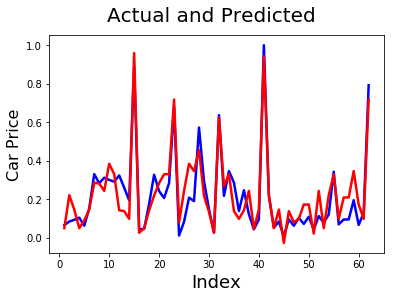

In [80]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'ytest-ypred')

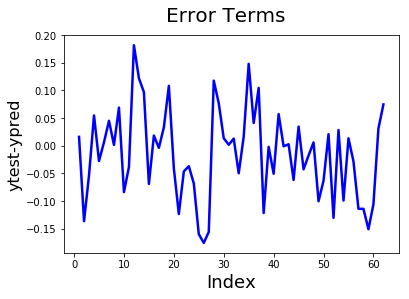

In [81]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

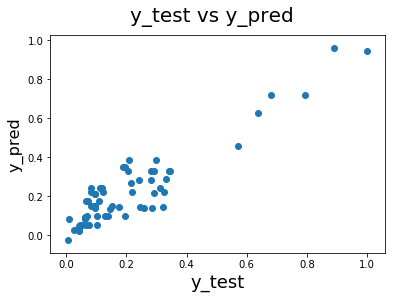

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

C:\dev\products\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

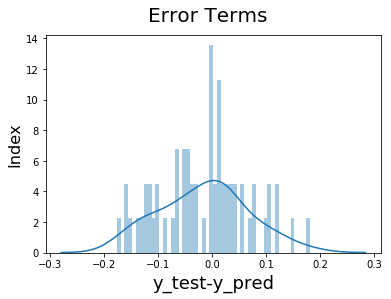

In [83]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [84]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.08205450388364953


# Conclusion

#### Below independent variables play important role while predicting price of a car in US market : 
#### enginelocation_rear(Categorical)
#### enginesize
#### manufacturing_country (derived categorically) [Germany, Sweden,USA]
#### enginetype_rotor(Categorical)

#### The below coefficients describe the price of a car:

enginelocation_rear               0.1543      
enginesize                        1.0690      
enginetype_rotor                  0.2498      
manufacturing_country_Germany     0.1269      
manufacturing_country_Sweden      0.1070      
manufacturing_country_USA         0.0627    

Mathematical formula:
Predictor variable (Price) = -0.1 + 0.1543(Engine Location Rear) + 1.069(enginesize) + 0.2498(engine type rotor) + 0.1269(manufacturing_country_Germany) + 0.1070 (manufacturing_country_Sweden) + 0.0627(manufacturing_country_USA)

Engine size, Engine Type and Engine Location play a significant role so cars have to be designed accordingly

Car manufacturers from other countries who have established business in US market also impact the pricing of cars. Business strategy has to be used in this case.